# Lambda School Data Science Unit 4 Sprint Challenge 4

## RNNs, CNNs, AutoML, and more...

In this sprint challenge, you'll explore some of the cutting edge of Data Science.

*Caution* - these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Part 1 - RNNs

Use an RNN to fit a simple classification model on tweets to distinguish from tweets from Austen Allred and tweets from Weird Al Yankovic.

Following is code to scrape the needed data (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper)):

In [6]:
!pip install twitterscraper

In [7]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen', 1000)
len(austen_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-14', 'from:austen since:2006-11-14 until:2007-07-11', 'from:austen since:2007-07-11 until:2008-03-05', 'from:austen since:2008-03-05 until:2008-10-30', 'from:austen since:2008-10-30 until:2009-06-25', 'from:austen since:2009-06-25 until:2010-02-19', 'from:austen since:2010-02-19 until:2010-10-15', 'from:austen since:2010-10-15 until:2011-06-11', 'from:austen since:2011-06-11 until:2012-02-04', 'from:austen since:2012-02-04 until:2012-09-30', 'from:austen since:2012-09-30 until:2013-05-26', 'from:austen since:2013-05-26 until:2014-01-20', 'from:austen since:2014-01-20 until:2014-09-15', 'from:austen since:2014-09-15 until:2015-05-12', 'from:austen since:2015-05-12 until:2016-01-05', 'from:austen since:2016-01-05 until:2016-08-31', 'from:austen since:2016-08-31 until:2017-04-26', 'from:austen since:2017-04-26 until:2017-12-21', 'from:austen since:2017-12-21 until:2018-08-16', 'from:austen since:2018-08-16 until:2019-04-12']
I041

INFO: Got 0 tweets (0 new).
I0412 11:04:17.727536 140042185225984 query.py:188] Got 0 tweets (0 new).
I0412 11:04:17.711835 140042185225984 query.py:128] Got 0 tweets for from%3Aausten%20since%3A2014-09-15%20until%3A2015-05-12.
INFO: Got 0 tweets (0 new).
I0412 11:04:17.740478 140042185225984 query.py:188] Got 0 tweets (0 new).
I0412 11:04:17.725422 140042185225984 query.py:128] Got 0 tweets for from%3Aausten%20since%3A2016-01-05%20until%3A2016-08-31.
INFO: Got 0 tweets (0 new).
I0412 11:04:17.752336 140042185225984 query.py:188] Got 0 tweets (0 new).
INFO: Got 0 tweets for from%3Aausten%20since%3A2016-08-31%20until%3A2017-04-26.
INFO: Got 0 tweets for from%3Aausten%20since%3A2013-05-26%20until%3A2014-01-20.
I0412 11:04:17.738286 140042185225984 query.py:128] Got 0 tweets for from%3Aausten%20since%3A2013-05-26%20until%3A2014-01-20.
INFO: Got 0 tweets for from%3Aausten%20since%3A2015-05-12%20until%3A2016-01-05.
INFO: Got 0 tweets (0 new).
I0412 11:04:17.784196 140042185225984 query.py:1

181

In [8]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

In [9]:
al_tweets = query_tweets('from:AlYankovic', 1000)
len(al_tweets)

INFO: queries: ['from:AlYankovic since:2006-03-21 until:2006-11-14', 'from:AlYankovic since:2006-11-14 until:2007-07-11', 'from:AlYankovic since:2007-07-11 until:2008-03-05', 'from:AlYankovic since:2008-03-05 until:2008-10-30', 'from:AlYankovic since:2008-10-30 until:2009-06-25', 'from:AlYankovic since:2009-06-25 until:2010-02-19', 'from:AlYankovic since:2010-02-19 until:2010-10-15', 'from:AlYankovic since:2010-10-15 until:2011-06-11', 'from:AlYankovic since:2011-06-11 until:2012-02-04', 'from:AlYankovic since:2012-02-04 until:2012-09-30', 'from:AlYankovic since:2012-09-30 until:2013-05-26', 'from:AlYankovic since:2013-05-26 until:2014-01-20', 'from:AlYankovic since:2014-01-20 until:2014-09-15', 'from:AlYankovic since:2014-09-15 until:2015-05-12', 'from:AlYankovic since:2015-05-12 until:2016-01-05', 'from:AlYankovic since:2016-01-05 until:2016-08-31', 'from:AlYankovic since:2016-08-31 until:2017-04-26', 'from:AlYankovic since:2017-04-26 until:2017-12-21', 'from:AlYankovic since:2017-12

I0412 11:04:29.018791 140042185225984 query.py:188] Got 240 tweets (60 new).
INFO: Got 60 tweets for from%3AAlYankovic%20since%3A2009-06-25%20until%3A2010-02-19.
I0412 11:04:29.014710 140042185225984 query.py:138] Got 60 tweets for from%3AAlYankovic%20since%3A2009-06-25%20until%3A2010-02-19.
INFO: Got 300 tweets (60 new).
I0412 11:04:29.051981 140042185225984 query.py:188] Got 300 tweets (60 new).
INFO: Got 60 tweets for from%3AAlYankovic%20since%3A2014-09-15%20until%3A2015-05-12.
I0412 11:04:29.228337 140042185225984 query.py:138] Got 60 tweets for from%3AAlYankovic%20since%3A2014-09-15%20until%3A2015-05-12.
INFO: Got 360 tweets (60 new).
I0412 11:04:29.258756 140042185225984 query.py:188] Got 360 tweets (60 new).
INFO: Got 60 tweets for from%3AAlYankovic%20since%3A2017-12-21%20until%3A2018-08-16.
I0412 11:04:29.328527 140042185225984 query.py:138] Got 60 tweets for from%3AAlYankovic%20since%3A2017-12-21%20until%3A2018-08-16.
INFO: Got 420 tweets (60 new).
I0412 11:04:29.336477 140042

960

In [10]:
al_tweets[2].text

'http://twitpic.com/83r19 - West Hollywood yogurt shop, take 2'

In [0]:
len(austen_tweets + al_tweets)

1141

In [11]:
import inspect
inspect.getmembers(austen_tweets[0])

[('__class__', twitterscraper.tweet.Tweet),
 ('__delattr__',
  <method-wrapper '__delattr__' of Tweet object at 0x7f5dd823ecc0>),
 ('__dict__',
  {'user': 'Austen',
   'fullname': 'Austen Allred',
   'id': '208451253062217728',
   'url': '/Austen/status/208451253062217728',
   'timestamp': datetime.datetime(2012, 6, 1, 6, 53, 46),
   'text': 'I love love love working with great people.pic.twitter.com/fCKOm6Vl',
   'replies': 0,
   'retweets': 0,
   'likes': 0,
   'html': '<p class="TweetTextSize js-tweet-text tweet-text" data-aria-label-part="0" lang="en">I love love love working with great people.<a class="twitter-timeline-link u-hidden" data-pre-embedded="true" dir="ltr" href="http://t.co/fCKOm6Vl">pic.twitter.com/fCKOm6Vl</a></p>'}),
 ('__dir__', <function Tweet.__dir__>),
 ('__doc__', None),
 ('__eq__',
  <bound method generate_eq.<locals>.decorator.<locals>.eq of <twitterscraper.tweet.Tweet object at 0x7f5dd823ecc0>>),
 ('__format__', <function Tweet.__format__>),
 ('__ge__',
  <b

In [12]:
tweets = []
labels=[]
final_text =''
for tweet in austen_tweets:
    tweets.append(tweet.text)
    labels.append(1)
    final_text = final_text + tweet.text
for tweet in al_tweets:
    tweets.append(tweet.text)
    labels.append(0)
    final_text = final_text + tweet.text

In [13]:
final_text

'I love love love working with great people.pic.twitter.com/fCKOm6VlElon Musk is severely underratedSpaceX 2002 vs 2017pic.twitter.com/dtzBID2Q3vYes. On the blockchain.This is a publicly traded company with no revenue and a $3 Billion+ market cap: http://www.longfincorp.com/business.html\xa0. Starting to get a sense for what 1999 was like. $LFINpic.twitter.com/t5K0TG86gsConvo in the @LambdaSchool Slack right now:\n\n"I started two other bootcamps before Lambda School, then quit because I learned more in the precourse work at Lambda than 6 and 8 weeks there."\n\n"I have a CS degree and I learn more with Lambda than I did with that."Startup roadmap 2017:\n\nFind an industry insulated by regulation and/or being boring.\n\nEnter industry with software.\n\nIndustry thinks you’re a punk kid that can’t possibly understand intricacies of x. They’re right at first, but you learn.\n\n10 yrs later no one can catch you.Hadn\'t set it up on a carrier before. Looks like I need to go to AT&T.TSLA cal

In [50]:
# final_text = final_text[:5000]

In [14]:
import numpy as np

chars = list(set(final_text)) # split and remove duplicate characters. convert to list.
# one hot encode
char_to_int = dict((c, i) for i, c in enumerate(chars)) # "enumerate" retruns index and value. Convert it to dictionary
int_to_char = dict((i, c) for i, c in enumerate(chars))

num_chars = len(chars) # the number of unique characters
txt_data_size = len(final_text)

print("unique characters : ", num_chars)
print("txt_data_size : ", txt_data_size)

unique characters :  106
txt_data_size :  110220


In [15]:
# integer encode input data
encoded_tweets=[]
for each_tweet in tweets:
    integer_encoded = [char_to_int[i] for i in each_tweet] # "integer_encoded" is a list which has a sequence converted from an original data to integers.
    encoded_tweets.append(integer_encoded)

In [16]:
X = np.array(encoded_tweets)
Y = np.array(labels)

In [17]:
print(X)

[list([105, 6, 20, 0, 5, 10, 6, 20, 0, 5, 10, 6, 20, 0, 5, 10, 6, 45, 0, 98, 58, 100, 9, 81, 6, 45, 100, 92, 18, 6, 81, 98, 10, 64, 92, 6, 17, 10, 0, 17, 20, 10, 51, 17, 100, 43, 51, 92, 45, 100, 92, 92, 10, 98, 51, 43, 0, 97, 16, 101, 76, 34, 41, 97, 23, 90, 20])
 list([56, 20, 0, 9, 6, 48, 49, 7, 58, 6, 100, 7, 6, 7, 10, 5, 10, 98, 10, 20, 103, 6, 49, 9, 40, 10, 98, 98, 64, 92, 10, 40])
 list([46, 17, 64, 43, 10, 78, 6, 77, 33, 33, 77, 6, 5, 7, 6, 77, 33, 79, 13, 17, 100, 43, 51, 92, 45, 100, 92, 92, 10, 98, 51, 43, 0, 97, 16, 40, 92, 32, 84, 105, 3, 77, 47, 57, 5])
 ...
 list([82, 92, 55, 92, 6, 6, 102, 18, 64, 92, 6, 92, 100, 97, 10, 6, 100, 9, 6, 79, 38, 61, 86, 6, 45, 18, 10, 9, 6, 105, 6, 20, 10, 92, 6, 48, 102, 90, 6, 81, 100, 5, 10, 6, 64, 45, 64, 103, 6, 97, 103, 6, 43, 64, 98, 65, 6, 6, 18, 92, 92, 17, 7, 65, 16, 16, 45, 45, 45, 51, 100, 9, 7, 92, 64, 81, 98, 64, 97, 51, 43, 0, 97, 16, 17, 16, 84, 60, 5, 96, 77, 60, 35, 9, 90, 77, 9, 16, 50])
 list([102, 18, 100, 7, 6, 100, 

In [22]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.75, test_size=0.25, shuffle=True)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((855,), (286,), (855,), (286,))

In [25]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 855
# cut texts after this number of words (among top max_features most common words)
maxlen = 140
batch_size = 20

# print('Loading data...')
# (x_train, y_train), (x_test, y_test) = integer_encoded(num_words=max_features)
# print(len(x_train), 'train sequences')
# print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (855, 140)
x_test shape: (286, 140)
Build model...
Instructions for updating:
Colocations handled automatically by placer.


W0412 11:06:01.254675 140042185225984 deprecation.py:323] From /home/mishraka/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0412 11:06:02.084354 140042185225984 deprecation.py:506] From /home/mishraka/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train...
Instructions for updating:
Use tf.cast instead.


W0412 11:06:02.514490 140042185225984 deprecation.py:323] From /home/mishraka/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 855 samples, validate on 286 samples
Epoch 1/15
855/855 [==============================] - 9s 11ms/step - loss: 0.4852 - acc: 0.8374 - val_loss: 0.3625 - val_acc: 0.8601
Epoch 2/15
855/855 [==============================] - 5s 6ms/step - loss: 0.3345 - acc: 0.8690 - val_loss: 0.3239 - val_acc: 0.8601
Epoch 3/15
855/855 [==============================] - 6s 7ms/step - loss: 0.2959 - acc: 0.8854 - val_loss: 0.3301 - val_acc: 0.8846
Epoch 4/15
855/855 [==============================] - 7s 9ms/step - loss: 0.2808 - acc: 0.8959 - val_loss: 0.2813 - val_acc: 0.9056
Epoch 5/15
855/855 [==============================] - 5s 6ms/step - loss: 0.2515 - acc: 0.9111 - val_loss: 0.2692 - val_acc: 0.9021
Epoch 6/15
855/855 [==============================] - 8s 9ms/step - loss: 0.2306 - acc: 0.9111 - val_loss: 0.2654 - val_acc: 0.9196
Epoch 7/15
855/855 [==============================] - 8s 9ms/step - loss: 0.2494 - acc: 0.9029 - val_loss: 0.2856 - val_acc: 0.8951
Epoch 8/15
855/855 [=========

Your tasks:

- Encode the characters to a sequence of integers for the model
- Get the data into the appropriate shape/format, including labels and a train/test split
- Use Keras to fit a predictive model, classifying tweets as being from Austen versus Weird Al
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

*Note* - focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
# TODO - your code!

Conclusion - RNN runs, and gives pretty decent improvement over a naive "It's Al!" model. To *really* improve the model, more playing with parameters, and just getting more data (particularly Austen tweets), would help. Also - RNN may well not be the best approach here, but it is at least a valid one.

## Part 2- CNNs

Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [59]:
!pip install google_images_download

In [1]:
# Step 0 - Imports
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps  # https://pillow.readthedocs.io/en/stable/
from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.measure import ransac
from skimage.transform import AffineTransform
import tensorflow as tf
import tensorflow_hub as hub

W0412 11:00:12.859616 140042185225984 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [4]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 15, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1. pondanimals.gif
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2. hqdefault.jpg
Image URL: https://www.featurepics.com/StockImage/20100713/pond-animals-stock-illustration-1611527.jpg
Completed Image ====> 3. pond-animals-stock-illustration-1611527.jpg
Image URL: https://pixnio.com/free-images/fauna-animals/reptiles-and-amphibians/alligators-and-crocodiles-pictures/alligator-animal-on-pond.jpg
Completed Image ====> 4. alligator-animal-on-pond.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 5. pkls4116_inline.png
Image URL: https://vetstreet-brightspot.s3.amazonaws.com/8d/ac/377fecad46d8820697c26efacc32/koi-pond-thinkstock-153560141-335sm61313.jpg
Completed Image ====> 6. koi-pond-thinkstock-153560141-335sm61313.jpg
Image URL:

In [62]:
absolute_image_paths

{'animal pond': ['/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit4/Deep Learning/downloads/animal pond/1. pondanimals.gif',
  '/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit4/Deep Learning/downloads/animal pond/2. hqdefault.jpg',
  '/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit4/Deep Learning/downloads/animal pond/3. koi-pond-thinkstock-153560141-335sm61313.jpg',
  '/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit4/Deep Learning/downloads/animal pond/4. pkls4116_inline.png',
  '/home/mishraka/Documents/Manjula/Lambda_School/Assignments/Unit4/Deep Learning/downloads/animal pond/5. alligator-animal-on-pond.jpg']}

In [114]:
# Resize all images to 224 x 224 pixels
image_path_list = absolute_image_paths['animal pond']

def resize_image(filename, new_width=256, new_height=256):
    pil_image = Image.open(filename)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert('RGB')
    pil_image_rgb.save(filename, format='JPEG', quality=90)

for path in image_path_list:
    resize_image(path, 224, 224)


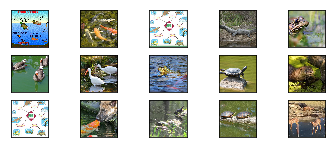

In [115]:
# Show images
def show_images(image_path_list):
    plt.figure();
    for i, image_path in enumerate(image_path_list):
        plt.subplot(5,5, i+1)
        plt.imshow(np.asarray(Image.open(image_path)))
#     plt.title(image_path)
        plt.grid(False)
        plt.yticks([])
        plt.xticks([])
    plt.show()

show_images(image_path_list)

In [116]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))

def interpret(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    return results

In [ ]:
all_predictions = []
for i, image_path in enumerate(image_path_list):
    results = interpret(process_img_path(image_path))
    all_predictions.append(results)
    print(results)

[('n06359193', 'web_site', 0.8378126), ('n04404412', 'television', 0.12383714), ('n04152593', 'screen', 0.011793065)]
[('n01443537', 'goldfish', 0.5762781), ('n02536864', 'coho', 0.32195944), ('n01630670', 'common_newt', 0.020042505)]
[('n04243546', 'slot', 0.9570968), ('n04476259', 'tray', 0.014467478), ('n03908618', 'pencil_box', 0.0074984524)]
[('n01698640', 'American_alligator', 0.5732961), ('n01737021', 'water_snake', 0.14206621), ('n01697457', 'African_crocodile', 0.073174275)]
[('n01641577', 'bullfrog', 0.6621541), ('n01644900', 'tailed_frog', 0.3061047), ('n01630670', 'common_newt', 0.013486897)]
[('n01860187', 'black_swan', 0.71131384), ('n02457408', 'three-toed_sloth', 0.17731619), ('n01855672', 'goose', 0.07990819)]
[('n02009912', 'American_egret', 0.8107691), ('n02012849', 'crane', 0.1400832), ('n02009229', 'little_blue_heron', 0.020460088)]
[('n01641577', 'bullfrog', 0.9894589), ('n01644900', 'tailed_frog', 0.010068835), ('n01644373', 'tree_frog', 0.00034489887)]
[('n01667

web_site: 0.838
television: 0.124
screen: 0.012


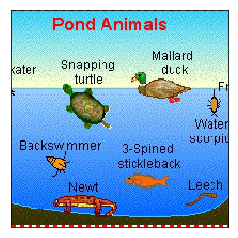


goldfish: 0.576
coho: 0.322
common_newt: 0.020


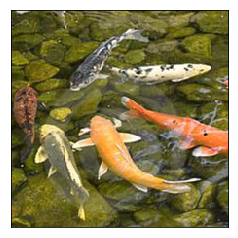


goldfish: 0.994
coral_reef: 0.005
coral_fungus: 0.000


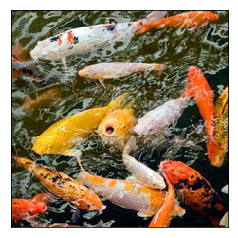


slot: 0.957
tray: 0.014
pencil_box: 0.007


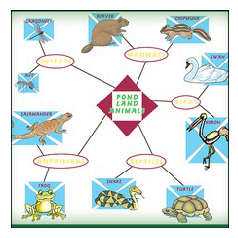


American_alligator: 0.573
water_snake: 0.142
African_crocodile: 0.073


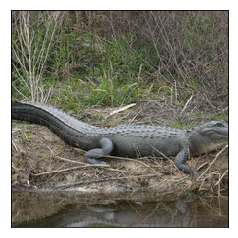

In [68]:
for path, prediction in zip(image_path_list, all_predictions):
  
  for _, animal, prob in prediction:
    print(f'{animal}: {prob:.3f}')

  plt.subplot()
  plt.imshow(np.asarray(Image.open(path)))
  plt.grid(False)
  plt.yticks([])
  plt.xticks([])
  plt.show()
  print()

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

## Part 3 - AutoML

Use [TPOT](https://github.com/EpistasisLab/tpot) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [69]:
!pip install tpot

In [70]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv

--2019-04-12 09:32:10--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.196.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.196.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  3.82MB/s    in 0.6s    

2019-04-12 09:32:12 (3.82 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



In [71]:
!head kc_house_data.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650
"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639
"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062
"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000
"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503
"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930
"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003",47.3097,-122.327,2238,6819
"2

As with previous questions, your goal is to run TPOT and successfully run and report error at the end.  Also, in the interest of time, feel free to choose small `generation=1` and `population_size=10` parameters so your pipeline runs efficiently and you are able to iterate and test.

*Hint* - you'll have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running, as long as you still get a valid model with reasonable predictive power.

In [73]:
import pandas as pd

df = pd.read_csv("kc_house_data.csv")

In [74]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [75]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [76]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [107]:
X = df.drop(columns=['price', 'date', 'id'])
y = df['price']

In [109]:
#now since our data is very different range, 
#it's better to scale our X matrix
#let's import sklearn
import sklearn
from sklearn.preprocessing import minmax_scale
X_scaled = sklearn.preprocessing.minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)

/home/mishraka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  


In [111]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=1, population_size=10, verbosity=2)
tpot.fit(X, y)

Generation 1 - Current best internal CV score: -27371109206.657623

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.15000000000000002, min_samples_leaf=11, min_samples_split=7, n_estimators=100)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1,
       max_eval_time_mins=5, max_time_mins=None, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0, use_dask=False,
       verbosity=2, warm_start=False)

## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

As a Data Scientist, I consider being able to spend some time learning about the data and coming up with the appropriate cleaning methods, thinking what features might be the most important, and selecting the best possible model my strongest area. I also feel confident being able to explain the results through visualizations and other methods to non-technical audience   

- What area of Data Science would you most like to learn more about, and why?

NLP interests me. I also think this is my weak area. I would want to focus on doing a small project around it. Another area I would like to dig deeper into is Unit 3. Learning more about dockers, Flask, and Databases is my another priority. 


- Where do you think Data Science will be in 5 years?

More automation is on the horizon. I feel that methods like TPOT are going to be more in practice. In my personal opinion, developing a deeper understanding in an area is going to be crucial where you can apply your DS knowledge. For example, if I develop a deeper understanding of issues in Economics, then I can always (longer)be in demand if I know DS stuff on top that my expertise in economics. Or if I go for a PhD in computer science, my in depth knowledge in CS will always be valued. 

A few sentences per answer is fine - only elaborate if time allows.

Thank you for your hard work, and congratulations! You've learned a lot, and should proudly call yourself a Data Scientist.